# Data Exploratory Stage #

"""
Author: Keita Eriawan
Date: 01/27/2019
"""





For this assignment, I will be following these stages:
1. Loading the data
2. Find the summarize information about the dataset
3. Plotting different graphs for outliers and trend-change threshold detection

In [1]:
##### Importing packages and load the data #####

# Python Packages #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

# Scikit-learn Model #
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Setting pandas print option #
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Specifying file name #
file = 'Apprentice_Chef_Dataset.xlsx'

# Reading the file #
apprentice_chef = pd.read_excel(file)

# Check the dataframe #
apprentice_chef

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,8793.750,1,Leyla Hightower,leyla.hightower@passport.com,Leyla,Hightower,81,1,8,10,50.00,1,0,0,1,5,1,34,6,5,0,0,40,165.2,3,1,3,13,186
1,8715.000,1,Beth Cassel,beth.cassel@unitedhealth.com,Beth,Cassel,118,1,9,5,38.00,1,0,0,0,6,1,0,0,4,1,1,90,188.4,5,1,4,11,296
2,8347.500,1,Harry Sawyer,harry.sawyer@yahoo.com,Harry,Sawyer,82,1,8,5,41.00,1,2,0,1,5,1,51,0,6,0,0,70,203.6,6,2,3,14,0
3,7550.000,1,Titus Peake,titus.peake@protonmail.com,Titus,Peake,303,6,10,10,224.35,1,1,0,1,6,1,0,7,5,1,0,10,431.6,8,2,4,10,1170
4,7473.375,0,Poxy Tym,poxy.tym@intel.com,Poxy,Tym,91,1,7,2,33.00,1,0,0,1,6,2,4,4,3,0,0,10,190.2,5,2,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,400.000,1,Mord,mord@verizon.com,Mord,Mord,15,4,11,9,88.00,1,2,0,1,6,2,2,3,9,1,0,40,131.7,4,0,2,15,0
1942,393.000,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,10,33.4,0,0,1,17,0
1943,349.000,1,Mag Mar Tun Doh Weg,mag.mar.tun.doh.weg@protonmail.com,Mag,Mar Tun Doh Weg,15,3,12,3,85.79,1,1,0,1,6,2,6,3,2,0,0,40,72.0,2,0,1,18,0
1944,222.250,1,Wallen,wallen@gmail.com,Wallen,Wallen,12,1,11,2,101.56,0,6,0,1,6,1,33,0,3,1,1,20,83.2,3,1,3,12,0


After I load my dataset, I would like to explore the dataset. Using different methods such as describe and info, I will be analysing the summarize information about the dataset.

In [2]:
##### Explanatory Analysis of the dataset #####

# First 5 rows of the dataset #
apprentice_chef.head()

# Info about the dataset #
apprentice_chef.info()

# Summary on the dataset #
apprentice_chef.describe().round(2)

# Name of all columns #
apprentice_chef.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

After looking on the data, I found out that some of the variables have a really huge variance. In order to avoid any unnecessary noises, I will like analyse any outliers and trends on the variables. For the outliers, I will be plotting bar graphs to look for outliers and scatterplot to analyse any trend changes.

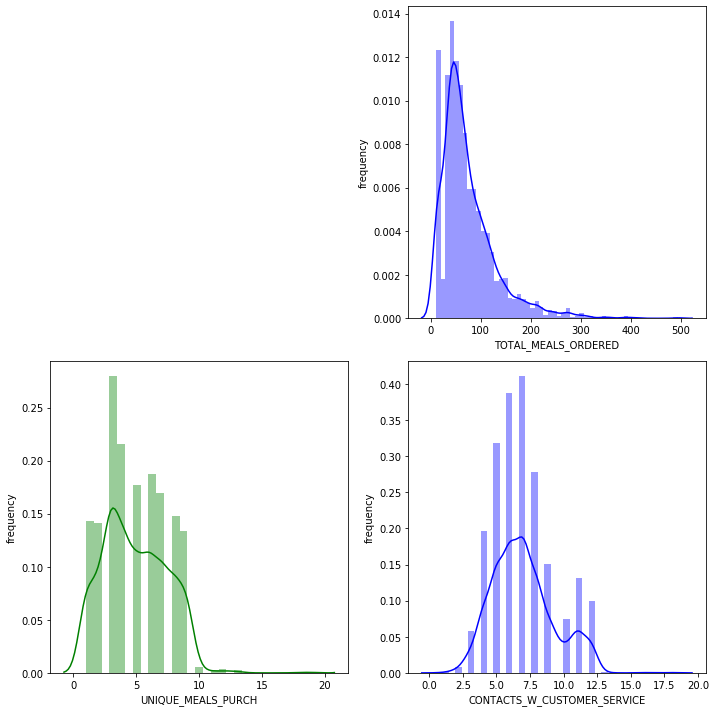

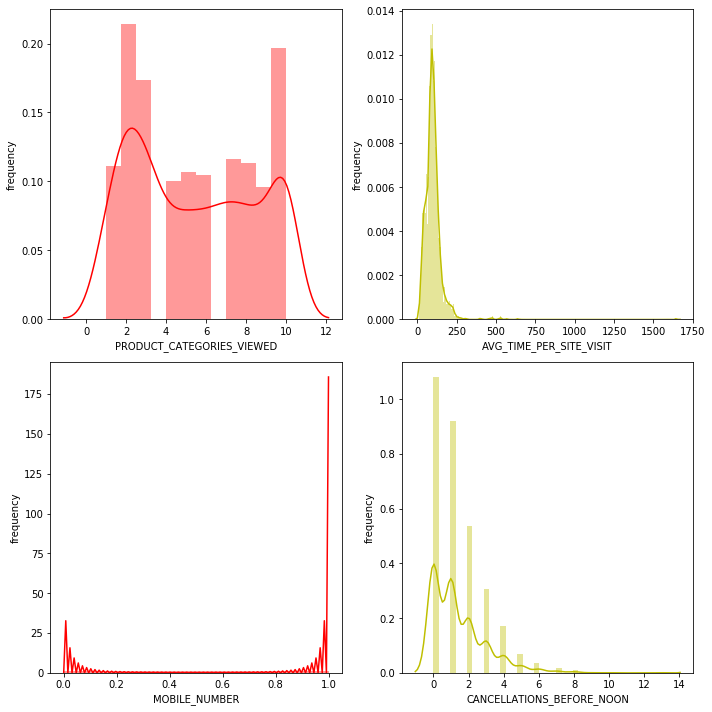

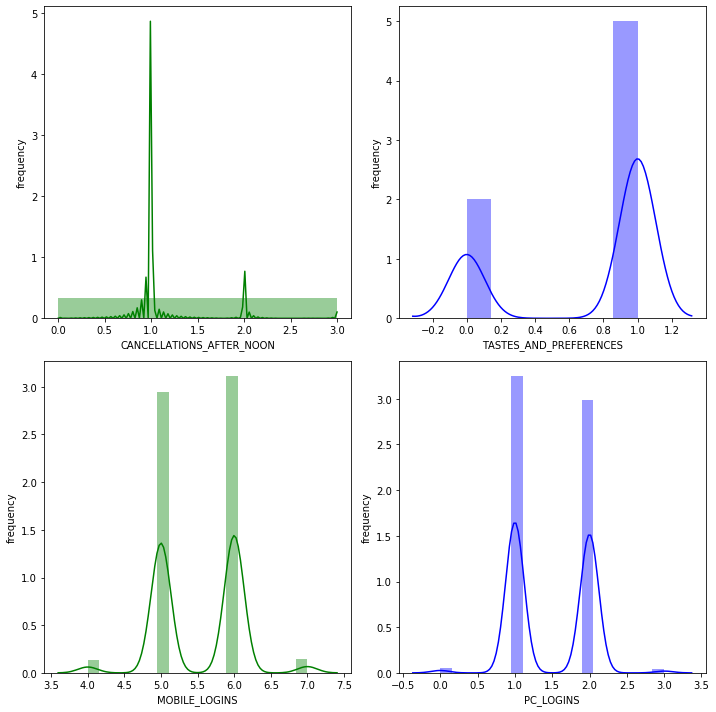

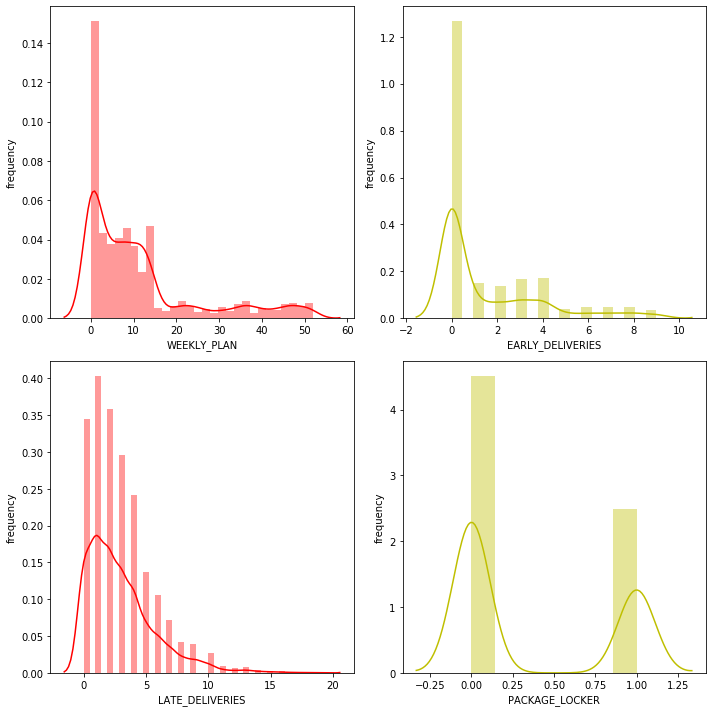

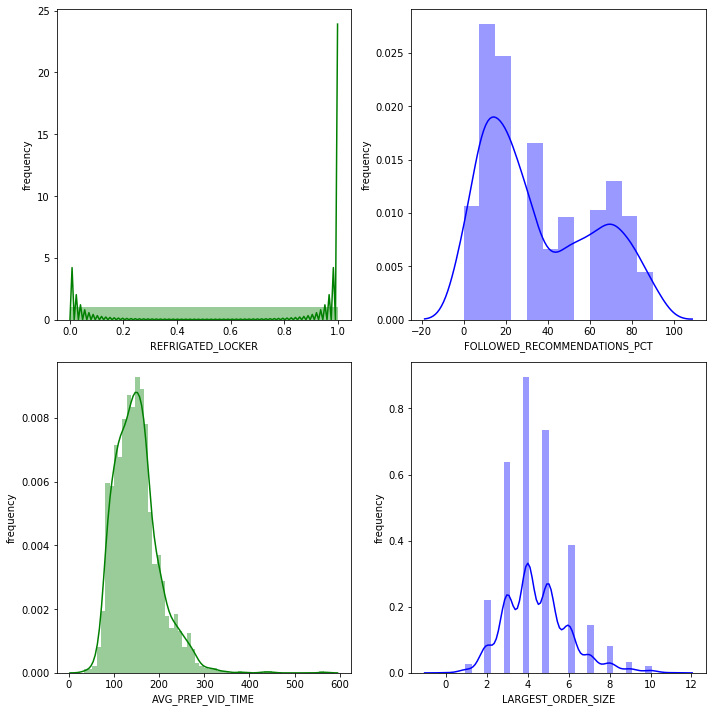

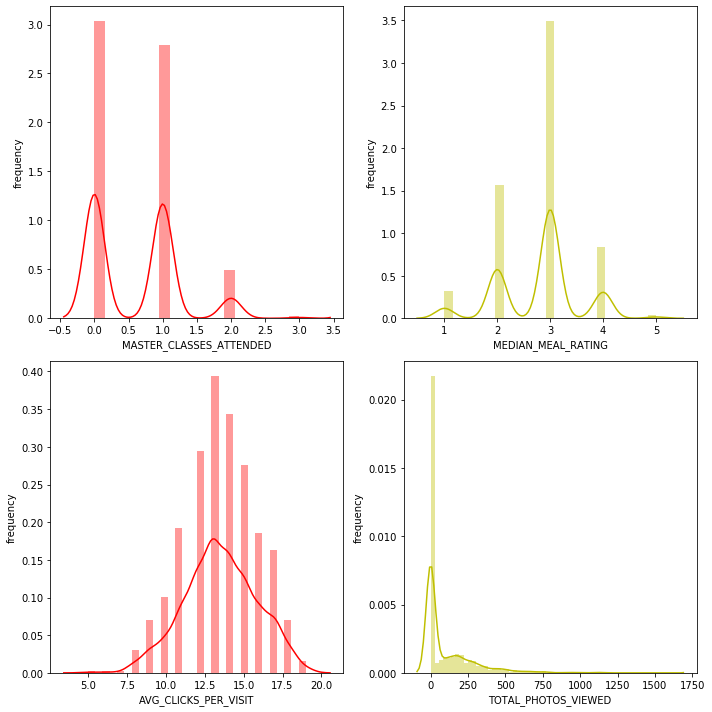

In [3]:
### Bar graph for outliers detection ###

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# total_meals_ordered #
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('TOTAL_MEALS_ORDERED')
plt.ylabel('frequency')

# unique_meals_purch #
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.ylabel('frequency')


# contacts_w_customer_service #
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# product_categories_viewed #
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.ylabel('frequency')

# avg_time_per_site_visit # 
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')
plt.ylabel('frequency')

# mobile_number # 
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['MOBILE_NUMBER'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MOBILE_NUMBER')
plt.ylabel('frequency')

# cancellations_before_noon # 
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# cancellations_after_noon #
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.ylabel('frequency')

# tastes_and_preferences #
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('TASTES_AND_PREFERENCES')
plt.ylabel('frequency')

# mobile_logins #
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('MOBILE_LOGINS')
plt.ylabel('frequency')

# pc_logins #
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('PC_LOGINS')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# weekly_plan #
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('WEEKLY_PLAN')
plt.ylabel('frequency')

# early_deliveries #
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')
plt.ylabel('frequency')

# late_deliveries # 
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('LATE_DELIVERIES')
plt.ylabel('frequency')

# package_locker #  
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PACKAGE_LOCKER')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# refrigerated_locker #  
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REFRIGATED_LOCKER')
plt.ylabel('frequency')

# followed_recommendations_pct # 
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.ylabel('frequency')

# avg_prep_vid_time # 
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')
plt.ylabel('frequency')

# largest_order_size #
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# master_classes_attended # 
plt.subplot(2, 2, 1)
sns.distplot(apprentice_chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.ylabel('frequency')

# median_meal_rating #
plt.subplot(2, 2, 2)
sns.distplot(apprentice_chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.ylabel('frequency')

# avg_clicks_per_visit #
plt.subplot(2, 2, 3)
sns.distplot(apprentice_chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.ylabel('frequency')

# total_photos_viewed #            
plt.subplot(2, 2, 4)
sns.distplot(apprentice_chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


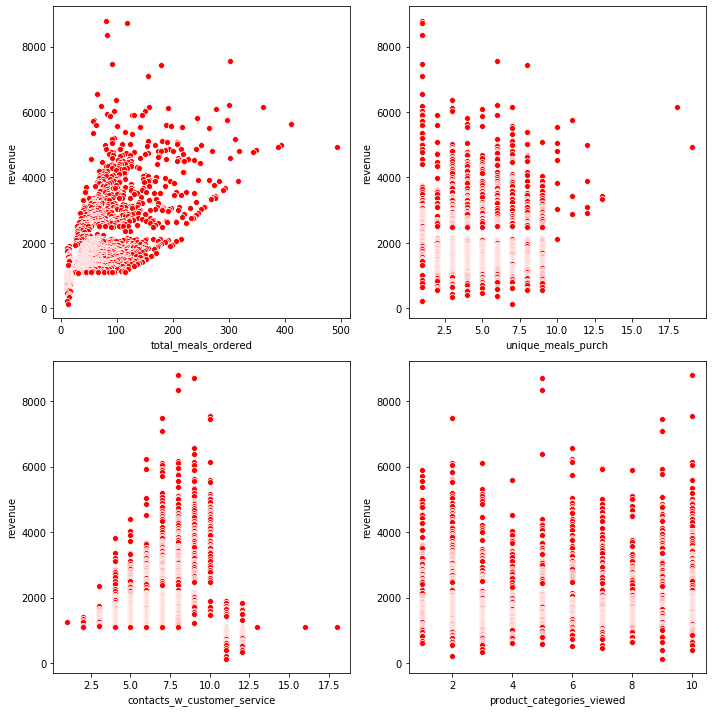

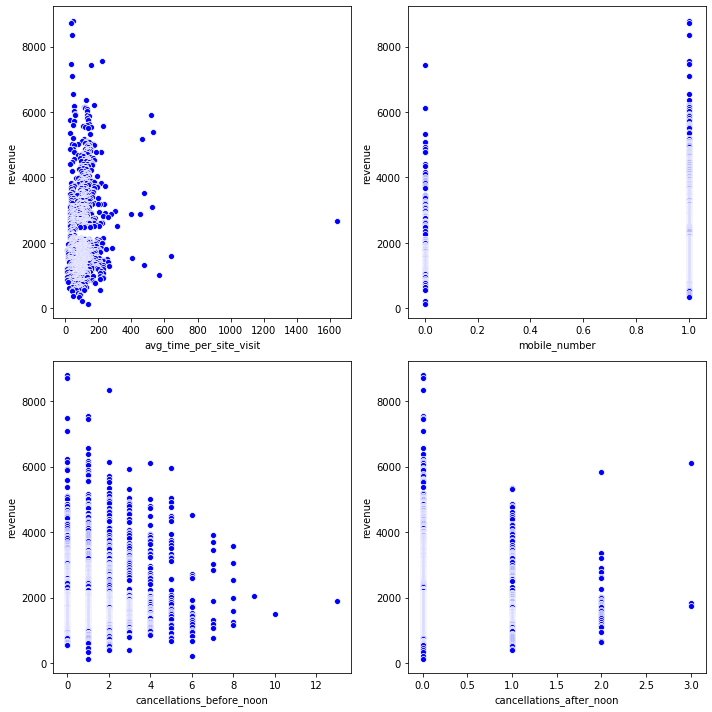

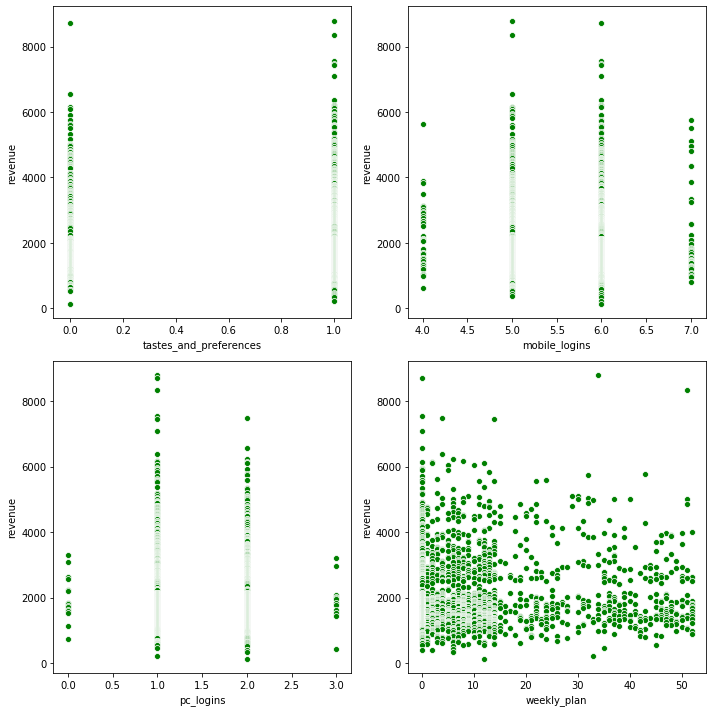

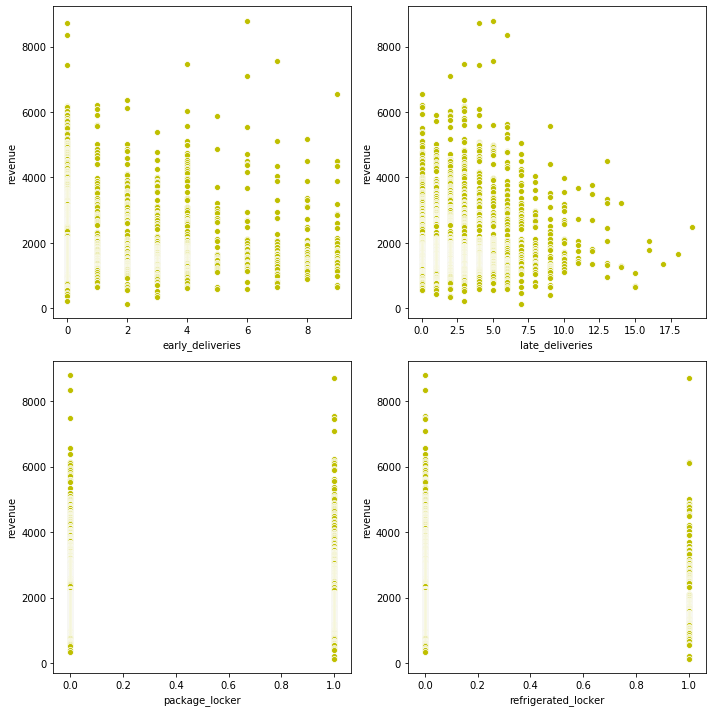

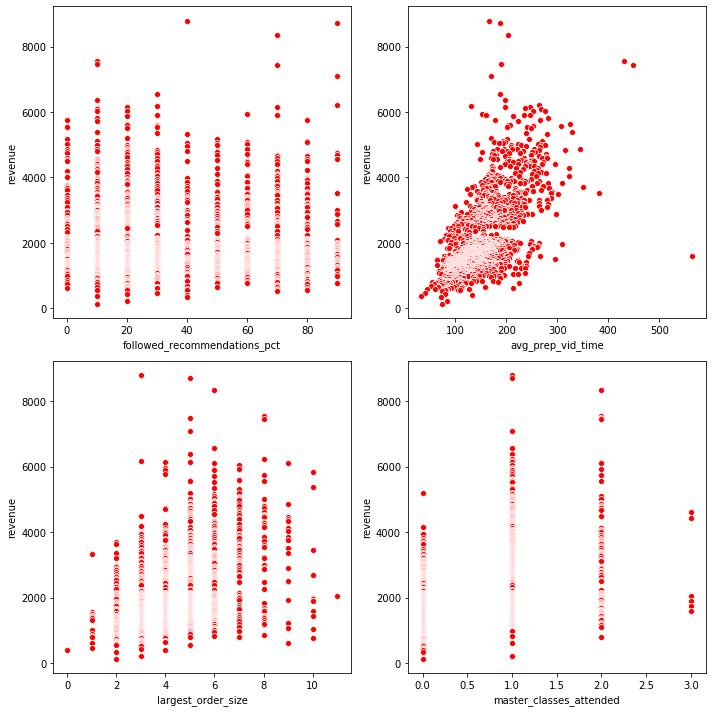

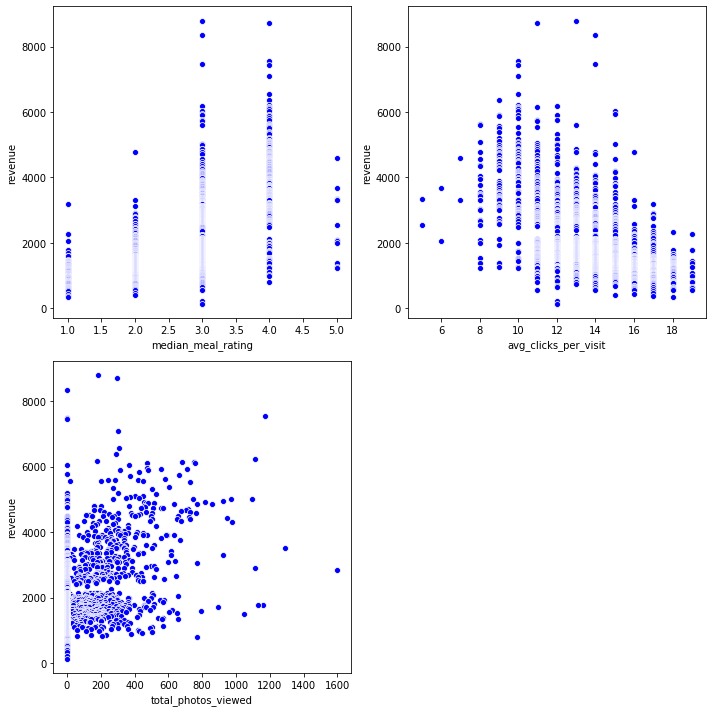

In [4]:
##### Scatterplot for trend change detection #####

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# total_meals_ordered #
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['TOTAL_MEALS_ORDERED'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('total_meals_ordered')
plt.ylabel('revenue')

# unique_meals_purch #
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['UNIQUE_MEALS_PURCH'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('unique_meals_purch')
plt.ylabel('revenue')


# contacts_w_customer_service #
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('contacts_w_customer_service')
plt.ylabel('revenue')


# product_categories_viewed #
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['PRODUCT_CATEGORIES_VIEWED'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('product_categories_viewed')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 1')
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# avg_time_per_site_visit # 
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('avg_time_per_site_visit')
plt.ylabel('revenue')

# mobile_number # 
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['MOBILE_NUMBER'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('mobile_number')
plt.ylabel('revenue')

# cancellations_before_noon # 
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['CANCELLATIONS_BEFORE_NOON'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('cancellations_before_noon')
plt.ylabel('revenue')

# cancellations_after_noon #
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['CANCELLATIONS_AFTER_NOON'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('cancellations_after_noon')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 2')
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# tastes_and_preferences #
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['TASTES_AND_PREFERENCES'],
               y = apprentice_chef['REVENUE'],
               color = 'g')
plt.xlabel('tastes_and_preferences')
plt.ylabel('revenue')

# mobile_logins #
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['MOBILE_LOGINS'],
               y = apprentice_chef['REVENUE'],
               color = 'g')
plt.xlabel('mobile_logins')
plt.ylabel('revenue')

# pc_logins #
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['PC_LOGINS'],
               y = apprentice_chef['REVENUE'],
               color = 'g')
plt.xlabel('pc_logins')
plt.ylabel('revenue')

# weekly_plan #
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['WEEKLY_PLAN'],
               y = apprentice_chef['REVENUE'],
               color = 'g')
plt.xlabel('weekly_plan')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 3')
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# early_deliveries #
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['EARLY_DELIVERIES'],
               y = apprentice_chef['REVENUE'],
               color = 'y')
plt.xlabel('early_deliveries')
plt.ylabel('revenue')

# late_deliveries # 
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['LATE_DELIVERIES'],
               y = apprentice_chef['REVENUE'],
               color = 'y')
plt.xlabel('late_deliveries')
plt.ylabel('revenue')

# package_locker #  
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['PACKAGE_LOCKER'],
               y = apprentice_chef['REVENUE'],
               color = 'y')
plt.xlabel('package_locker')
plt.ylabel('revenue')

# refrigerated_locker #  
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['REFRIGERATED_LOCKER'],
               y = apprentice_chef['REVENUE'],
               color = 'y')
plt.xlabel('refrigerated_locker')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 4')
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# followed_recommendations_pct # 
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('followed_recommendations_pct')
plt.ylabel('revenue')

# avg_prep_vid_time # 
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['AVG_PREP_VID_TIME'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('avg_prep_vid_time')
plt.ylabel('revenue')

# largest_order_size #
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['LARGEST_ORDER_SIZE'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('largest_order_size')
plt.ylabel('revenue')

# master_classes_attended # 
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['MASTER_CLASSES_ATTENDED'],
               y = apprentice_chef['REVENUE'],
               color = 'r')
plt.xlabel('master_classes_attended')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 5')
plt.show()


##############################################################################

# Figure and axis size #
fig, ax = plt.subplots(figsize = (10, 10)) # fitting the axis 

# median_meal_rating #
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['MEDIAN_MEAL_RATING'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('median_meal_rating')
plt.ylabel('revenue')

# avg_clicks_per_visit #
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['AVG_CLICKS_PER_VISIT'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('avg_clicks_per_visit')
plt.ylabel('revenue')

# total_photos_viewed #            
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
               y = apprentice_chef['REVENUE'],
               color = 'b')
plt.xlabel('total_photos_viewed')
plt.ylabel('revenue')
plt.tight_layout()
plt.savefig('AC Scatter 6')
plt.show()

# Feature Engineering #

In this stage, I will be doing feature engineering which focuses on finding the best variables for the model:
1. Separating explanatory variables into different thresholds
2. Creating a new explanatory variables
3. Creating dummy variables for categorical variables

In [5]:
# Checking the quantile ranges for the dataset #
apprentice_chef.loc[:, :].quantile([0,0.05,0.10,
                         0.20,0.30,0.40, 0.50,0.60,
                         0.70, 0.80, 0.90, 0.95, 1.00])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.00,131.00,0.0,11.00,1.0,1.0,1.0,10.3300,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.400,0.0,0.0,1.0,5.0,0.0
0.05,929.25,0.0,14.00,1.0,4.0,1.0,34.6125,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.850,2.0,0.0,1.0,10.0,0.0
0.10,1097.00,0.0,15.00,2.0,4.0,2.0,43.8000,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,92.300,3.0,0.0,2.0,11.0,0.0
0.20,1285.00,0.0,35.00,3.0,5.0,2.0,61.5800,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,108.600,3.0,0.0,2.0,12.0,0.0
0.30,1420.00,0.0,43.00,3.0,6.0,3.0,78.0000,1.0,0.0,0.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,0.0,20.0,121.700,4.0,0.0,2.0,12.0,0.0
0.40,1558.00,1.0,51.00,4.0,6.0,4.0,86.5100,1.0,1.0,0.0,1.0,5.0,1.0,5.0,0.0,2.0,0.0,0.0,20.0,134.400,4.0,0.0,3.0,13.0,0.0
0.50,1740.00,1.0,60.00,5.0,7.0,5.0,94.1600,1.0,1.0,0.0,1.0,6.0,1.0,7.0,0.0,2.0,0.0,0.0,30.0,145.600,4.0,1.0,3.0,13.0,0.0
0.60,1910.00,1.0,71.00,6.0,7.0,6.0,102.6200,1.0,1.0,0.0,1.0,6.0,2.0,10.0,1.0,3.0,0.0,0.0,40.0,156.700,5.0,1.0,3.0,14.0,28.0
0.70,2388.75,1.0,86.50,6.0,8.0,8.0,111.2050,1.0,2.0,0.0,1.0,6.0,2.0,12.0,2.0,4.0,1.0,0.0,50.0,168.000,5.0,1.0,3.0,15.0,132.0
0.80,2895.00,1.0,106.00,7.0,9.0,9.0,123.8000,1.0,2.0,0.0,1.0,6.0,2.0,16.0,3.0,5.0,1.0,0.0,70.0,183.800,6.0,1.0,3.0,16.0,210.0


After plotting the graphs, I have noticed the presence of different outliers and changing trends on some variables. In order to obtain this information for our model, I will be creating two thresholds: outlier thresholds and trend-changes outliers.

In [6]:
### Creating an outlier threshold ###

# Outlier threshold #

TOTAL_MEALS_ORDERED_hi          = 150
UNIQUE_MEALS_PURCH_hi           = 7
CONTACTS_W_CUSTOMER_SERVICE_lo  = 4
CONTACTS_W_CUSTOMER_SERVICE_hi  = 9
AVG_TIME_PER_SITE_VISIT_hi      = 180
CANCELLATIONS_BEFORE_NOON_hi    = 1
CANCELLATIONS_AFTER_NOON_hi     = 2
MOBILE_LOGINS_lo                = 5
MOBILE_LOGINS_hi                = 6
PC_LOGINS_lo                    = 1
PC_LOGINS_hi                    = 2
WEEKLY_PLAN_hi                  = 15
EARLY_DELIVERIES_hi             = 2
LATE_DELIVERIES_hi              = 5
FOLLOWED_RECOMMENDATIONS_PCT_hi = 30
AVG_PREP_VID_TIME_hi            = 200
LARGEST_ORDER_SIZE_lo           = 2
LARGEST_ORDER_SIZE_hi           = 6
MASTER_CLASSES_ATTENDED_hi      = 2
AVG_CLICKS_PER_VISIT_lo         = 10
TOTAL_PHOTOS_VIEWED_hi          = 500
TOTAL_PHOTOS_VIEWED_lo          = 0

In [7]:
### Creating the trend-change threshold ###

# Trend change threshold #

CANCELLATIONS_AFTER_NOON_change = 0
TOTAL_PHOTOS_VIEWED_change = 0
WEEKLY_PLAN_change = 15
AVERAGE_CLICKS_PER_VISIT_change = 10

Now, I will be adding the outlier and trend changes variables on the dataset. 

In [8]:
### Creating the outlier columns  ###

# TOTAL_MEALS_ORDERED #

apprentice_chef['OUT_TOTAL_MEALS_ORDERED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][apprentice_chef['TOTAL_MEALS_ORDERED'] 
                                                                 > TOTAL_MEALS_ORDERED_hi]

apprentice_chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# UNIQUE_MEALS_PURCH #

apprentice_chef['OUT_UNIQUE_MEALS_PURCH'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][apprentice_chef['UNIQUE_MEALS_PURCH'] 
                                                                 > UNIQUE_MEALS_PURCH_hi ]

apprentice_chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE #

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']
                                                                         > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] 
                                                                         < CONTACTS_W_CUSTOMER_SERVICE_lo]                                                                 

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_TIME_PER_SITE_VISIT #

apprentice_chef['OUT_AVG_TIME_PER_SITE_VISIT'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][apprentice_chef['AVG_TIME_PER_SITE_VISIT']
                                                                         > AVG_TIME_PER_SITE_VISIT_hi]

apprentice_chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON #

apprentice_chef['OUT_CANCELLATIONS_BEFORE_NOON'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][apprentice_chef['CANCELLATIONS_BEFORE_NOON']
                                                                         > CANCELLATIONS_BEFORE_NOON_hi]

apprentice_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON #

apprentice_chef['OUT_CANCELLATIONS_AFTER_NOON'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][apprentice_chef['CANCELLATIONS_AFTER_NOON']
                                                                         > CANCELLATIONS_AFTER_NOON_hi]

apprentice_chef['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# EARLY_DELIVERIES # 

apprentice_chef['OUT_EARLY_DELIVERIES'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_EARLY_DELIVERIES'][apprentice_chef['EARLY_DELIVERIES'] 
                                                                 > EARLY_DELIVERIES_hi]

apprentice_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
# LATE_DELIVERIES # 

apprentice_chef['OUT_LATE_DELIVERIES'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_LATE_DELIVERIES'][apprentice_chef['LATE_DELIVERIES'] 
                                                                 > LATE_DELIVERIES_hi]

apprentice_chef['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT #

apprentice_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] 
                                                                 > FOLLOWED_RECOMMENDATIONS_PCT_hi]

apprentice_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
# AVG_PREP_VID_TIME #

apprentice_chef['OUT_AVG_PREP_VID_TIME'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_AVG_PREP_VID_TIME'][apprentice_chef['AVG_PREP_VID_TIME'] 
                                                                 > AVG_PREP_VID_TIME_hi]

apprentice_chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE #

apprentice_chef['OUT_LARGEST_ORDER_SIZE'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE']
                                                                         > LARGEST_ORDER_SIZE_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice_chef['LARGEST_ORDER_SIZE'] 
                                                                         < LARGEST_ORDER_SIZE_lo]                                                                 

apprentice_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# MASTER_CLASSES_ATTENDED #

apprentice_chef['OUT_MASTER_CLASSES_ATTENDED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][apprentice_chef['MASTER_CLASSES_ATTENDED'] 
                                                                 > MASTER_CLASSES_ATTENDED_hi]

apprentice_chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# AVG_CLICKS_PER_VISIT # 

apprentice_chef['OUT_AVG_CLICKS_PER_VISIT'] = 0

# Creating the condition for outliers #
condition_lo = apprentice_chef.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice_chef['AVG_CLICKS_PER_VISIT'] 
                                                                         < AVG_CLICKS_PER_VISIT_lo]                                                                 

apprentice_chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED #

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'] = 0

# Creating the condition for outliers #
condition_hi = apprentice_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED']
                                                                         > TOTAL_PHOTOS_VIEWED_hi]
condition_lo = apprentice_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] 
                                                                         < TOTAL_PHOTOS_VIEWED_lo]                                                                 

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

In [9]:
### Create the new features for the trend-based threshold #

# CANCELLATIONS_AFTER_NOON #
apprentice_chef['CHANGE_CANCELLATIONS_AFTER_NOON'] = 0

# Creating the condition for trend-change threshold #
condition = apprentice_chef.loc[0:,'CHANGE_CANCELLATIONS_AFTER_NOON'][apprentice_chef['CANCELLATIONS_AFTER_NOON'] 
                                                               == CANCELLATIONS_AFTER_NOON_change]

apprentice_chef['CHANGE_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                       value      = 1,
                                        inplace    = True)

# TOTAL_PHOTOS_VIEWED #

apprentice_chef['CHANGE_TOTAL_PHOTOS_VIEWED'] = 0

# Creating the condition for trend-change threshold #
condition = apprentice_chef.loc[0:,'CHANGE_TOTAL_PHOTOS_VIEWED'][apprentice_chef['TOTAL_PHOTOS_VIEWED'] 
                                                              == TOTAL_PHOTOS_VIEWED_change]

apprentice_chef['CHANGE_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# WEEKLY_PLAN #

apprentice_chef['CHANGE_WEEKLY_PLAN'] = 0

# Creating the condition for trend-change threshold #
condition = apprentice_chef.loc[0:,'CHANGE_WEEKLY_PLAN'][apprentice_chef['WEEKLY_PLAN'] 
                                                              == WEEKLY_PLAN_change]

apprentice_chef['CHANGE_WEEKLY_PLAN'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
# AVERAGE_CLICKS_PER_VISIT #

apprentice_chef['CHANGE_AVG_CLICKS_PER_VISIT'] = 0

# Creating the condition for trend-change threshold #
condition = apprentice_chef.loc[0:,'CHANGE_AVG_CLICKS_PER_VISIT'][apprentice_chef['AVG_CLICKS_PER_VISIT'] 
                                                              == AVERAGE_CLICKS_PER_VISIT_change]

apprentice_chef['CHANGE_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)



After dealing with the outliers and trend threshold, I will move on to the categorical variables. The first thing that I want to do is to separate the email domains. I believe that there will be an insight by creating different features on the email domain. We can see what type of people ordered the most meal.

In [10]:
### Splitting email names: name and domain ###

# Placeholder list #
placeholder_lst = []

# Creating a for loop to separate the domain and email name #
for index, col in apprentice_chef.iterrows():
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)

# Creating a new dataframe for the separate email name and domain #
email_df = pd.DataFrame(placeholder_lst)

I will be concatenating the new domain into a new variable

In [11]:
### Concatenating the new email domain with the  original dataset ###

# Renaming the column #
email_df.columns = ['email_name', 'email_domain']

# Concatenating email_domain with apprentice_chef df #
apprentice_chef = pd.concat([apprentice_chef, email_df.loc[ : , 'email_domain']],
                           axis=1)

# Checking the counts on each domain #
apprentice_chef.loc[ : , 'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
merck.com            28
cocacola.com         28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
mmm.com              22
verizon.com          22
caterpillar.com      22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

I will be creating a list of personal and junk email. I will also create a for loop to determine the type of domain.

In [12]:
### Categorising the email type by domain ###

# Creating a list of domain types #

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com','@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                    '@passport.com']

# placeholder list #
placeholder_lst = []

# Creating a loop for categorising email domain #
for domain in apprentice_chef['email_domain']:
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')
    else:
        placeholder_lst.append('professional')
        
# Concatenating with original DataFrame #
apprentice_chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# Checking the count of each email type #
apprentice_chef['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

I will create a dummy variable to mark the domain type; professional, junk and personal.

In [13]:
## Creating a dummy variable for the email domain ###

#one hot encoding categorical variables #
one_hot_domain_group = pd.get_dummies(apprentice_chef['DOMAIN_GROUP'])

# Dropping the domain_group, email_domain, FIRST_NAME, EMAIL and DOMAIN_GROUP #
apprentice_chef = apprentice_chef.drop('FIRST_NAME', axis = 1)
apprentice_chef = apprentice_chef.drop('EMAIL', axis = 1)
apprentice_chef = apprentice_chef.drop('email_domain', axis = 1)
apprentice_chef = apprentice_chef.drop('DOMAIN_GROUP', axis = 1)

# Joining codings together #
apprentice_chef = apprentice_chef.join([one_hot_domain_group])

# saving new columns #
new_columns = apprentice_chef.columns

Another categorical data that the family name. I would like to combine the family names together into one column. I would like to combine the family name that has more than 10 members in one group and the family name with less than 10 members to be group in a different column.

In [14]:
### Categorising the family_name type ###

# Family name greater and equal to 10 #
FAMILY_NAME_OVER_10 = ['Frey', 'Stark', 'Lannister', 'Tyrell', 'Targaryen', 
             'Hightower', 'Greyjoy', 'Vance', 'Florent', 'Royce', 'Botley'
             'Rivers', 'Martel', 'Sand','Baratheon', 'Harlaw', 'Bracken',
             'Arryn']

# placeholder list #
placeholder_lst = []

# Creating a loop for categorising email domain #
for family in apprentice_chef['FAMILY_NAME']:
    if family in FAMILY_NAME_OVER_10:
        placeholder_lst.append('FAMILY_OVER_10')
    else:
        placeholder_lst.append('FAMILY_BELOW_10')
        
# Concatenating with original DataFrame #
apprentice_chef['FAMILY_SIZE'] = pd.Series(placeholder_lst)

# Value count for the family size #
apprentice_chef['FAMILY_SIZE'].value_counts()

FAMILY_BELOW_10    1632
FAMILY_OVER_10      314
Name: FAMILY_SIZE, dtype: int64

I will create a dummy variable for family with member over 10 and family with member below 10

In [15]:
### Changing the family name variable with dummy variables ###

# one hot encoding categorical variables #
one_hot_family_name = pd.get_dummies(apprentice_chef['FAMILY_SIZE'])

# Dropping the domain_group, email_domain,  #
apprentice_chef = apprentice_chef.drop('FAMILY_NAME', axis = 1)
apprentice_chef = apprentice_chef.drop('FAMILY_SIZE', axis = 1)

# joining codings together #

apprentice_chef = apprentice_chef.join([one_hot_family_name])

# saving new columns #
new_columns = apprentice_chef.columns

For the next one, I would like to identify the people that has 10% or 20% off from their weekly meal plan. It is also good to find the base subscriber for the meal plan and see if the weekly meal plan is working or not.

In [16]:
# Creating a blank series with panda #
series_new = pd.Series([]) 

# For loop to find out the weekly plan for 10% or 20% #
for i in range(len(apprentice_chef)): 
    if apprentice_chef['WEEKLY_PLAN'][i] == 3: 
        series_new[i]= 10
  
    elif apprentice_chef['WEEKLY_PLAN'][i] >= 5: 
        series_new[i]= 20
  
    else: 
        series_new[i]= 0 
        
# Put new column for the discount #         
apprentice_chef.insert(49,'DISCOUNT_PCT', series_new)

I would also like to create a new feature: Average meal ordered per month and Average meal price per month. 
1. Average meal ordered per month = total meal ordered / 12 
2. Average meal price per month = Revenue / total meal ordered

It would be great to see the average meal that each person ordered per month and the average cost for the meal. With this, we can detect their order habit and if they are in the high price tier or low price tier

In [17]:
# Average total meal ordered per month #
apprentice_chef['AVERAGE_MEAL_ORDERED_PER_MONTH'] = apprentice_chef['TOTAL_MEALS_ORDERED'] / 12

# Average price for the meal per month #
apprentice_chef['AVERAGE_PRICE_PER_MONTH'] = apprentice_chef['REVENUE'] / apprentice_chef['TOTAL_MEALS_ORDERED']

# Building the Model #

Now that I have all of my desired variables, I will be using these variables to create my model. But first of all, I will look at the correlation for each variables:
1. Checking the correlation between the target variable and explanatory variable
2. Create Order Least Regression (base) model using statsmodel
3. Train and test the dataset
4. Create linear regression, lasso regression and ridge regression model.
5. Boosting the model using ensemble method: Gradient Boosting

In [18]:
### Correlation ###

# The correlation of each of variable with "REVENUE" #
apprentice_chef_corr = apprentice_chef.corr().round(2)

# Printing the result of the correlation #
print(apprentice_chef_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                             1.00
AVG_PREP_VID_TIME                   0.64
MEDIAN_MEAL_RATING                  0.61
TOTAL_MEALS_ORDERED                 0.60
AVERAGE_MEAL_ORDERED_PER_MONTH      0.60
OUT_AVG_PREP_VID_TIME               0.50
TOTAL_PHOTOS_VIEWED                 0.47
MASTER_CLASSES_ATTENDED             0.45
LARGEST_ORDER_SIZE                  0.44
OUT_TOTAL_MEALS_ORDERED             0.43
CHANGE_AVG_CLICKS_PER_VISIT         0.36
OUT_AVG_CLICKS_PER_VISIT            0.34
OUT_TOTAL_PHOTOS_VIEWED             0.29
OUT_LARGEST_ORDER_SIZE              0.28
AVG_TIME_PER_SITE_VISIT             0.14
CONTACTS_W_CUSTOMER_SERVICE         0.10
OUT_CANCELLATIONS_AFTER_NOON        0.04
CHANGE_CANCELLATIONS_AFTER_NOON     0.04
PRODUCT_CATEGORIES_VIEWED           0.03
FAMILY_OVER_10                      0.03
MOBILE_NUMBER                       0.03
OUT_MASTER_CLASSES_ATTENDED         0.03
AVERAGE_PRICE_PER_MONTH             0.02
MOBILE_LOGINS                       0.02
OUT_AVG_TIME_PER

Now that I have checked correlations, I will create my base model using the statsmodel function. I will be using all of my variables to check the value of r2

In [19]:
# making a copy of apprentice_chef #
apprentice_chef_explanatory = apprentice_chef.copy()


# dropping Revenue and Name from the explanatory variable set #
apprentice_chef_explanatory = apprentice_chef_explanatory.drop(['REVENUE', 'NAME'], axis = 1)


# formatting each explanatory variable for statsmodels #
for val in apprentice_chef_explanatory:
    print(f"apprentice_chef['{val}'] +")

apprentice_chef['CROSS_SELL_SUCCESS'] +
apprentice_chef['TOTAL_MEALS_ORDERED'] +
apprentice_chef['UNIQUE_MEALS_PURCH'] +
apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] +
apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] +
apprentice_chef['AVG_TIME_PER_SITE_VISIT'] +
apprentice_chef['MOBILE_NUMBER'] +
apprentice_chef['CANCELLATIONS_BEFORE_NOON'] +
apprentice_chef['CANCELLATIONS_AFTER_NOON'] +
apprentice_chef['TASTES_AND_PREFERENCES'] +
apprentice_chef['MOBILE_LOGINS'] +
apprentice_chef['PC_LOGINS'] +
apprentice_chef['WEEKLY_PLAN'] +
apprentice_chef['EARLY_DELIVERIES'] +
apprentice_chef['LATE_DELIVERIES'] +
apprentice_chef['PACKAGE_LOCKER'] +
apprentice_chef['REFRIGERATED_LOCKER'] +
apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
apprentice_chef['AVG_PREP_VID_TIME'] +
apprentice_chef['LARGEST_ORDER_SIZE'] +
apprentice_chef['MASTER_CLASSES_ATTENDED'] +
apprentice_chef['MEDIAN_MEAL_RATING'] +
apprentice_chef['AVG_CLICKS_PER_VISIT'] +
apprentice_chef['TOTAL_PHOTOS_VIEWED'] +
apprentice_chef['O

I will be creating an ordinary least regression (OLS) model

In [20]:
### Creating the OLS mregression using all of the variables ###

lm_full = smf.ols(formula = """ apprentice_chef['REVENUE'] ~ 
                                apprentice_chef['CROSS_SELL_SUCCESS'] +
                                apprentice_chef['TOTAL_MEALS_ORDERED'] +
                                apprentice_chef['UNIQUE_MEALS_PURCH'] +
                                apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_chef['PRODUCT_CATEGORIES_VIEWED'] +
                                apprentice_chef['AVG_TIME_PER_SITE_VISIT'] +
                                apprentice_chef['MOBILE_NUMBER'] +
                                apprentice_chef['CANCELLATIONS_BEFORE_NOON'] +
                                apprentice_chef['CANCELLATIONS_AFTER_NOON'] +
                                apprentice_chef['TASTES_AND_PREFERENCES'] +
                                apprentice_chef['MOBILE_LOGINS'] +
                                apprentice_chef['PC_LOGINS'] +
                                apprentice_chef['WEEKLY_PLAN'] +
                                apprentice_chef['EARLY_DELIVERIES'] +
                                apprentice_chef['LATE_DELIVERIES'] +
                                apprentice_chef['PACKAGE_LOCKER'] +
                                apprentice_chef['REFRIGERATED_LOCKER'] +
                                apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                apprentice_chef['AVG_PREP_VID_TIME'] +
                                apprentice_chef['LARGEST_ORDER_SIZE'] +
                                apprentice_chef['MASTER_CLASSES_ATTENDED'] +
                                apprentice_chef['MEDIAN_MEAL_RATING'] +
                                apprentice_chef['AVG_CLICKS_PER_VISIT'] +
                                apprentice_chef['TOTAL_PHOTOS_VIEWED'] +
                                apprentice_chef['OUT_TOTAL_MEALS_ORDERED'] +
                                apprentice_chef['OUT_UNIQUE_MEALS_PURCH'] +
                                apprentice_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_chef['OUT_AVG_TIME_PER_SITE_VISIT'] +
                                apprentice_chef['OUT_CANCELLATIONS_BEFORE_NOON'] +
                                apprentice_chef['OUT_CANCELLATIONS_AFTER_NOON'] +
                                apprentice_chef['OUT_EARLY_DELIVERIES'] +
                                apprentice_chef['OUT_LATE_DELIVERIES'] +
                                apprentice_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] +
                                apprentice_chef['OUT_AVG_PREP_VID_TIME'] +
                                apprentice_chef['OUT_LARGEST_ORDER_SIZE'] +
                                apprentice_chef['OUT_MASTER_CLASSES_ATTENDED'] +
                                apprentice_chef['OUT_AVG_CLICKS_PER_VISIT'] +
                                apprentice_chef['OUT_TOTAL_PHOTOS_VIEWED'] +
                                apprentice_chef['CHANGE_CANCELLATIONS_AFTER_NOON'] +
                                apprentice_chef['CHANGE_TOTAL_PHOTOS_VIEWED'] +
                                apprentice_chef['CHANGE_WEEKLY_PLAN'] +
                                apprentice_chef['CHANGE_AVG_CLICKS_PER_VISIT'] +
                                apprentice_chef['junk'] +
                                apprentice_chef['personal'] +
                                apprentice_chef['professional'] +
                                apprentice_chef['FAMILY_BELOW_10'] +
                                apprentice_chef['FAMILY_OVER_10'] +
                                apprentice_chef['DISCOUNT_PCT'] +
                                apprentice_chef['AVERAGE_MEAL_ORDERED_PER_MONTH'] +
                                apprentice_chef['AVERAGE_PRICE_PER_MONTH'] """,
                                data = apprentice_chef)

results = lm_full.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     apprentice_chef['REVENUE']   R-squared:                       0.775
Model:                                    OLS   Adj. R-squared:                  0.770
Method:                         Least Squares   F-statistic:                     139.4
Date:                        Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                                21:32:11   Log-Likelihood:                -15002.
No. Observations:                        1946   AIC:                         3.010e+04
Df Residuals:                            1898   BIC:                         3.037e+04
Df Model:                                  47                                         
Covariance Type:                    nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                            -677.6596    168.899     -4.012      0.000   -1008.906    -346.413
apprentice_chef['CROSS_SELL_SUCCESS']                 -50.5379     34.335     -1.472      0.141    -117.877      16.801
apprentice_chef['TOTAL_MEALS_ORDERED']                 14.1280      0.504     28.017      0.000      13.139      15.117
apprentice_chef['UNIQUE_MEALS_PURCH']                 -37.8937      7.652     -4.952      0.000     -52.901     -22.886
apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE']        -27.0538      7.274     -3.719      0.000     -41.320     -12.788
apprentice_chef['PRODUCT_CATEGORIES_VIEWED']            3.8845      4.135      0.939      0.348      -4.225      11.994
apprentice_chef['AVG_TIME_PER_SITE_VISIT']             -0.0961      0.267     -0.360      0.719      -0.620       0.427
apprentice_chef['MOBILE_NUMBER']                       11.2967     38.553      0.293      0.770     -64.314      86.908
apprentice_chef['CANCELLATIONS_BEFORE_NOON']          -13.3750     13.642     -0.980      0.327     -40.130      13.381
apprentice_chef['CANCELLATIONS_AFTER_NOON']           -18.4026     96.342     -0.191      0.849    -207.349     170.544
apprentice_chef['TASTES_AND_PREFERENCES']              -7.2455     27.812     -0.261      0.794     -61.791      47.300
apprentice_chef['MOBILE_LOGINS']                        1.8727     21.548      0.087      0.931     -40.388      44.134
apprentice_chef['PC_LOGINS']                          -43.1229     23.833     -1.809      0.071     -89.864       3.618
apprentice_chef['WEEKLY_PLAN']                          1.3537      1.175      1.152      0.249      -0.950       3.658
apprentice_chef['EARLY_DELIVERIES']                    24.3084     11.128      2.185      0.029       2.485      46.132
apprentice_chef['LATE_DELIVERIES']                      3.8072      7.375      0.516      0.606     -10.658      18.272
apprentice_chef['PACKAGE_LOCKER']                      22.7519     29.955      0.760      0.448     -35.996      81.500
apprentice_chef['REFRIGERATED_LOCKER']                -36.2532     45.146     -0.803      0.422    -124.794      52.288
apprentice_chef['FOLLOWED_RECOMMENDATIONS_PCT']        -0.9465      1.051     -0.901      0.368      -3.007       1.114
apprentice_chef['AVG_PREP_VID_TIME']                    6.6181      0.592     11.175      0.000       5.457       7.780
apprentice_chef['LARGEST_ORDER_SIZE']                 -85.5027     14.771     -5.788      0.000    -114.472     -56.533
apprentice_chef['MASTER_CLASSES_ATTENDED']            139.9499     23.340      5.996      0.000      94.175     185

Now, I will train and test my dataset. With this train and test dataset, I will applied it to different regression analysis: Linear, Lasso and Ridge. I will be setting the seed as 222 and split the data into 75% training and 25% test.

In [21]:
### Creating the explanatory variables dataset for training and test ###

appchef_data = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 
                'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
                'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 
                'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
                'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
                'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
                'TOTAL_PHOTOS_VIEWED', 'OUT_TOTAL_MEALS_ORDERED', 'OUT_UNIQUE_MEALS_PURCH', 
                'OUT_CONTACTS_W_CUSTOMER_SERVICE', 'OUT_AVG_TIME_PER_SITE_VISIT', 
                'OUT_CANCELLATIONS_BEFORE_NOON', 'OUT_CANCELLATIONS_AFTER_NOON', 
                'OUT_EARLY_DELIVERIES', 'OUT_LATE_DELIVERIES', 'OUT_FOLLOWED_RECOMMENDATIONS_PCT', 
                'OUT_AVG_PREP_VID_TIME', 'OUT_LARGEST_ORDER_SIZE', 'OUT_MASTER_CLASSES_ATTENDED', 
                'OUT_AVG_CLICKS_PER_VISIT', 'OUT_TOTAL_PHOTOS_VIEWED',
               'CHANGE_CANCELLATIONS_AFTER_NOON', 'CHANGE_TOTAL_PHOTOS_VIEWED', 
                'CHANGE_WEEKLY_PLAN', 'CHANGE_AVG_CLICKS_PER_VISIT', 'junk', 'personal', 
                'professional', 'FAMILY_BELOW_10', 'FAMILY_OVER_10', 'DISCOUNT_PCT', 
                'AVERAGE_MEAL_ORDERED_PER_MONTH', 'AVERAGE_PRICE_PER_MONTH']

appchef_target = ['REVENUE']

Create the linear regression model

In [22]:
### Linear Regression ###

# Default seed #
SEED = 222

# Conduct the train/test plit #
X_train, X_test, y_train, y_test = train_test_split(apprentice_chef[appchef_data], 
                                                    apprentice_chef[appchef_target],
                                                    test_size = 0.25,                                                    random_state = SEED)
# Instantiating the model #
lr = LinearRegression()


# Fitting it to the training data #
lr_fit = lr.fit(X_train, y_train)


# Predicting the trained data into new data #
lr_pred = lr_fit.predict(X_test)


# printing the score for the results #
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

Training Score: 0.7795
Testing Score: 0.7547


Creating the Lasso regression model

In [23]:
### Lasso Regression ###

# Default seed #
SEED = 222

# Conduct the train/test plit #
X_train, X_test, y_train, y_test = train_test_split(apprentice_chef[appchef_data], 
                                                    apprentice_chef[appchef_target],
                                                    test_size = 0.25,
                                                    random_state = SEED)
# Instantiating the model #
lasso = Lasso(alpha=0.1, normalize = True)

# Fitting it to the training data #
lasso_fit  = lasso.fit(X_train, y_train)


# Predicting the trained data into new data #
lasso_pred = lasso.predict(X_test)

# printing the score for the results #
print('Training Score:', lasso.score(X_train, y_train).round(4))
print('Testing Score:',  lasso.score(X_test, y_test).round(4))


Training Score: 0.778
Testing Score: 0.7535


In [24]:
### Ridge Regression ###
SEED = 222

# INSTANTIATING a model object

# Conduct the train/test plit #
X_train, X_test, y_train, y_test = train_test_split(apprentice_chef[appchef_data], 
                                                    apprentice_chef[appchef_target],
                                                    test_size = 0.25,
                                                    random_state = SEED)

# Instantiating the model #                                                
ridge = Ridge(alpha=0.1, normalize = True)

# Fitting it to the training data #
ridge_fit  = ridge.fit(X_train, y_train)


# Predicting the trained data into new data #
ridge_pred = ridge_fit.predict(X_test)

# printing the score for the results #
print('Training Score:', ridge.score(X_train, y_train).round(4))
print('Testing Score:',  ridge.score(X_test, y_test).round(4))

Training Score: 0.7676
Testing Score: 0.7273


Using the Gradient Boosting to improve the r2 value

In [25]:
### Ensemble Learning: Gradient Boosting ###

SEED = 222

# INSTANTIATING a model object

# Conduct the train/test plit #
X_train, X_test, y_train, y_test = train_test_split(apprentice_chef[appchef_data], 
                                                    apprentice_chef[appchef_target],
                                                    test_size = 0.25,
                                                    random_state = SEED)

# Creating the new gradient boosting model #
gradient_mod = GradientBoostingRegressor()

# Fitting the model into the training data #
gradient_mod.fit(X_train, y_train)

# Predicting the model #
gradient_mod_pred = gradient_mod.predict(X_test)

# Printing the score for the model #
print(gradient_mod.score(X_train, y_train))
print(gradient_mod.score(X_test, y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9856856489586303
0.9610830888272025
